In [64]:
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from plot_cmp import plot_compare


In [65]:
data=pd.read_csv("all_res/covtype_type1_all.csv")
data.head()

,acc,val_acc,type,sigma,lambda,n1,n2,n3,n4,sp1,sp2,sp3,sp4
0,0.835355,0.831962,type1,0.0001,0.003299,53.333333,50.0,50.000000,20.000000,0.035432,0.001067,0.002000,0.000000
1,0.828181,0.825037,type1,0.0001,0.006589,53.333333,50.0,49.666667,18.333333,0.051852,0.002133,0.035333,0.083333
2,0.835813,0.832795,type1,0.0001,0.009878,53.000000,50.0,49.333333,18.666667,0.110741,0.003867,0.050000,0.066667
3,0.835929,0.833182,type1,0.0001,0.013168,52.000000,50.0,49.666667,18.666667,0.153210,0.002267,0.024667,0.071429
4,0.835441,0.832721,type1,0.0001,0.016457,49.666667,50.0,49.000000,19.333333,0.195062,0.002000,0.028000,0.033333


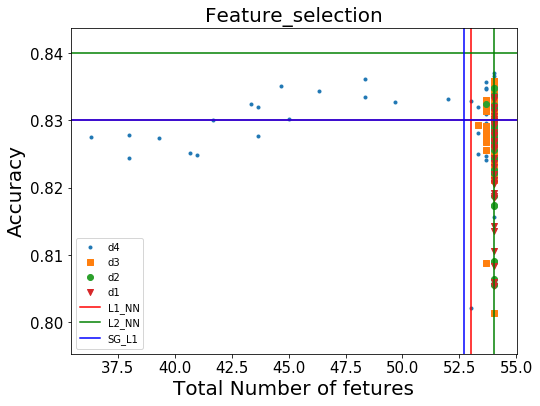

In [66]:
data=data[data["val_acc"]>0.8]
d4=data[data["sigma"] <0.001]
d3=data[(data["sigma"] <0.01) & (data["sigma"]>=0.001)]
d2=data[(data["sigma"] <0.1) & (data["sigma"] >=0.01)]
d1=data[(data["sigma"] <1) & (data["sigma"] >=0.1)]

data_list=[d4,d3,d2,d1]
dataset_label_list=["d4","d3","d2","d1"]
bench_list=["SG_L1","L1_NN","L2_NN"]
fig=plot_compare(dataset_list=data_list,data_label=dataset_label_list,compare_type="Feature_selection",dataset_name="covtype",bench_list=bench_list)

<Figure size 432x288 with 0 Axes>

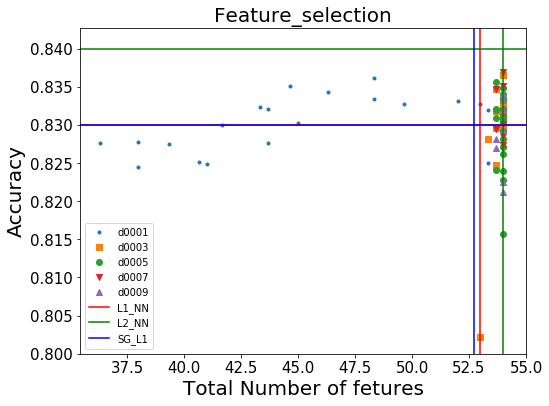

In [63]:
fig3=plt.figure()
d0001=data[data["sigma"] ==0.0001]
d0003=data[data["sigma"] ==0.0003]
d0005=data[data["sigma"] ==0.0005]
d0007=data[data["sigma"] ==0.0007]
d0009=data[data["sigma"] ==0.0009]

d0000_data=[d0001,d0003,d0005,d0007,d0009]
d0000_label=["d0001","d0003","d0005","d0007","d0009"]
bench_list=["SG_L1","L1_NN","L2_NN"]
fig=plot_compare(dataset_list=d0000_data,data_label=d0000_label,compare_type="Feature_selection",dataset_name="covtype",bench_list=bench_list)

In [35]:
def type1(x,sigma=0.05):
    numerator=x**2
    denominator=x**2+sigma**2
    regularization=np.divide(numerator,denominator)
    return regularization

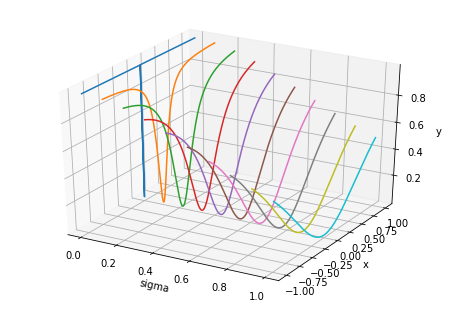

In [46]:
x=np.linspace(-1,1,100000)
sigma_list=np.linspace(0.0001,1,10)
fig2=plt.figure()
ax=Axes3D(fig2)
for sig in sigma_list:
    y1=type1(x,sig)
    sigma_array=np.full_like(x,sig)
    ax.plot(sigma_array,x,y1)
    ax.set_xlabel("sigma")
    ax.set_ylabel("x")
    ax.set_zlabel("y")


[0.0001, 0.0003, 0.0005, 0.0007, 0.0009, 0.001, 0.003, 0.005, 0.006999999999999999, 0.009000000000000001]


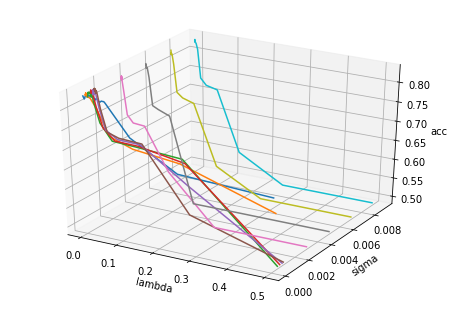

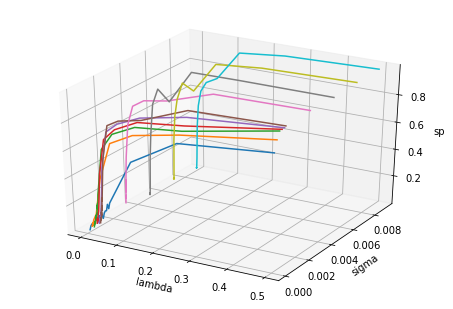

In [15]:
fig1=plt.figure()
fig2=plt.figure()
ax=Axes3D(fig1)
data["sp_sum"]=(data["sp1"]+data["sp2"]+data["sp3"]+data["sp4"])/4.0
ax2=Axes3D(fig2)
#data=data[data["sigma"]<0.01]
sigma=data["sigma"].drop_duplicates().tolist()
print(sigma)

for sig in sigma:
    temp=data[data["sigma"]==sig]
    ax.plot(temp["lambda"],temp["sigma"],temp["val_acc"])
    ax.set_xlabel("lambda")
    ax.set_ylabel("sigma")
    ax.set_zlabel("acc")
    
    ax2.plot(temp["lambda"],temp["sigma"],temp["sp_sum"])
    ax2.set_xlabel("lambda")
    ax2.set_ylabel("sigma")
    ax2.set_zlabel("sp")
    